# Structuring Data in Pandas

In [1]:
import numpy as np
name = ['Matt', 'Cat', 'Eric']
gpa = [3.8, 4.0, 3.5]
salary = [150000, 160000, 30000]

In [2]:
data = np.zeros(3, dtype={'names': ('name', 'GPA', 'salary'), 
                         'formats':('U10', 'f4', 'f8')})
data

array([(u'', 0., 0.), (u'', 0., 0.), (u'', 0., 0.)],
      dtype=[('name', '<U10'), ('GPA', '<f4'), ('salary', '<f8')])

In [3]:
data['name'] = name
data['GPA'] = gpa
data['salary'] = salary
print(data)

[(u'Matt', 3.8, 150000.) (u'Cat', 4. , 160000.) (u'Eric', 3.5,  30000.)]


In [4]:
print(data['name'])

[u'Matt' u'Cat' u'Eric']


In [5]:
x = data[data['GPA'] >= 3.8]['name']
for name in x:
    print(name)

Matt
Cat


## Why Pandas instead of NumPy

Using NumPy to structure data can be useful, if you plan to do some simple numerical operations on well-organized, clean data. For messier data and more complex operations, Pandas is a better choice.

Pandas is a newer package (AKA code that's been written and vetted by other, much smarter people) built on top of NumPy. It gives you an efficient and powerful storage interface for your data.

In [6]:
import pandas as pd
gpa = pd.Series(data['GPA'])
gpa

0    3.8
1    4.0
2    3.5
dtype: float32

In [7]:
gpa.values

array([3.8, 4. , 3.5], dtype=float32)

In [8]:
gpa.index

RangeIndex(start=0, stop=3, step=1)

In [9]:
gpa[0]

3.8

In [10]:
gpa[1:3]

1    4.0
2    3.5
dtype: float32

We can even assign names to the indices, rather than just using numbers (like we would have done in NumPy). Notice that the function pd.Series() takes in two arguments -- the first is the actual data you want to put in the array, and the second is the names of the indices for the data. 

In [11]:
gpa = pd.Series(data['GPA'], data['name'])
gpa

Matt    3.8
Cat     4.0
Eric    3.5
dtype: float32

In [12]:
gpa['Phoebe'] = 4.0
gpa

Matt      3.8
Cat       4.0
Eric      3.5
Phoebe    4.0
dtype: float64

In [13]:
gpa[1:3]

Cat     4.0
Eric    3.5
dtype: float64

### DataFrames

The next fundamental structure in Pandas is the DataFrame, which is basically like a Excel spreadsheet -- a lot of 1D columns, or Series, aligned together by shared indices.

In [14]:
salary = pd.Series(data['salary'], data['name'])
salary

Matt    150000.0
Cat     160000.0
Eric     30000.0
dtype: float64

In [15]:
##Defining a DataFrame here using the gpa and salary Series
execBoard = pd.DataFrame({'gpa': gpa, 'salary': salary})
execBoard

## ALSO: notice that Phoebe's salary is missing --> we'll discuss how 
# handle missing values later

,gpa,salary
Cat,4.0,160000.0
Eric,3.5,30000.0
Matt,3.8,150000.0
Phoebe,4.0,NaN


We can now extract series from a DataFrame:

In [16]:
execBoard['gpa']

Cat       4.0
Eric      3.5
Matt      3.8
Phoebe    4.0
Name: gpa, dtype: float64

### Operations on Pandas DataFrames

In [17]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [18]:
df = pd.DataFrame(rng.randint(1, 10, (3,4)),
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,7,3,7,8
1,5,4,8,8
2,3,6,5,2


In [19]:
## ufuncs work on DataFrames too! Because it's optimized for use
## with NumPy, which is super convenient
1.0 / df

,A,B,C,D
0,0.142857,0.333333,0.142857,0.125
1,0.200000,0.250000,0.125000,0.125
2,0.333333,0.166667,0.200000,0.500


In [20]:
df2 = pd.DataFrame(rng.randint(1, 10, (3,4)),
                 columns=['A', 'B', 'C', 'D'])
df2

,A,B,C,D
0,8,6,2,5
1,1,6,9,1
2,3,7,4,9


In [21]:
df + df2

,A,B,C,D
0,15,9,9,13
1,6,10,17,9
2,6,13,9,11


### Handling Missing Data

In [22]:
execBoard

,gpa,salary
Cat,4.0,160000.0
Eric,3.5,30000.0
Matt,3.8,150000.0
Phoebe,4.0,NaN


In [23]:
execBoard['salary'].isnull()

Cat       False
Eric      False
Matt      False
Phoebe     True
Name: salary, dtype: bool

In [24]:
execBoard['salary'].dropna()

Cat     160000.0
Eric     30000.0
Matt    150000.0
Name: salary, dtype: float64

In [25]:
execBoard.dropna()

,gpa,salary
Cat,4.0,160000.0
Eric,3.5,30000.0
Matt,3.8,150000.0


In [26]:
execBoard.fillna(0)

,gpa,salary
Cat,4.0,160000.0
Eric,3.5,30000.0
Matt,3.8,150000.0
Phoebe,4.0,0.0


### Pivot Tables

In [27]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
# try to pivot (group by some variable) manually
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [29]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [30]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


 DataFrame.pivot_table(data, values=None, index=None, columns=None,
                          aggfunc='mean', fill_value=None, margins=False,
                          dropna=True, margins_name='All')

In [31]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [32]:
titanic.pivot_table(index='sex', columns='class',
                   aggfunc={'survived':'mean', 'alone':'mean'})

alone                      survived                    
class      First    Second     Third     First    Second     Third
sex                                                               
female  0.361702  0.421053  0.416667  0.968085  0.921053  0.500000
male    0.614754  0.666667  0.760807  0.368852  0.157407  0.135447

## US Birthrate Example

In [33]:
births = pd.read_csv('~/Downloads/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [34]:
births['decade'] = 10 * (births['year'] // 10)
births['decade'].head()

0    1960
1    1960
2    1960
3    1960
4    1960
Name: decade, dtype: int64

In [35]:
births.pivot_table('births', index ='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


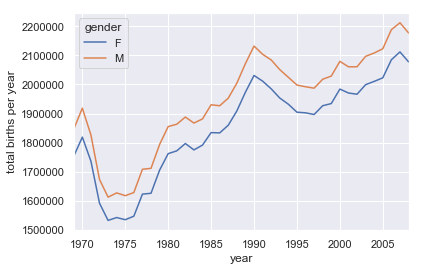

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns # formatting stuff
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [37]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [38]:
#Estimate sample mean for a Gaussian distrubtion
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
# filter out values that don't have births within mu +- 5 * sig

In [39]:
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

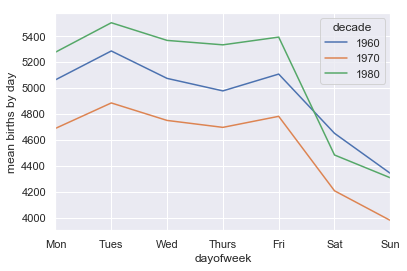

In [40]:
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade',
                  aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [41]:
births_by_date = births.pivot_table('births', [births.index.month, 
                                               births.index.day])
# 2012 is just an arbitrary dummy year --> we choose a leap year
# so we can handle February 29
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month,day) in births_by_date.index]
births_by_date.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq=None)

[Text(0,0.5,'average daily births'),
 Text(0.5,1,'USA births by day of year (1969-1988)')]

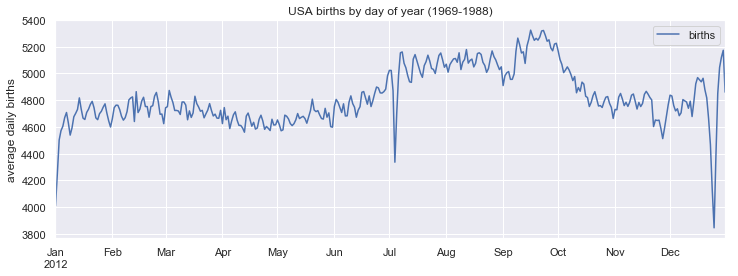

In [42]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')


## AMZN Example - Time Series Operations

In [43]:
from pandas_datareader import data
amzn = data.DataReader('AMZN', start='2004', end='2016',
                      data_source='yahoo')
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-01-02,53.130001,51.430000,52.759998,51.900002,6639900,51.900002
2004-01-05,53.599998,51.369999,52.000000,53.270000,11284100,53.270000
2004-01-06,53.500000,52.740002,53.110001,53.029999,5985500,53.029999
2004-01-07,52.660000,50.939999,52.180000,51.900002,9242700,51.900002
2004-01-08,52.099998,50.029999,52.090000,50.240002,10320300,50.240002


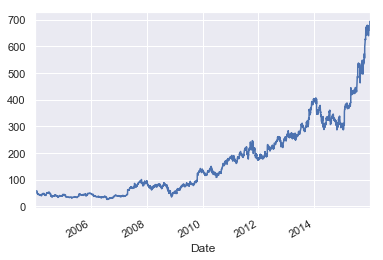

In [44]:
import seaborn; seaborn.set()
amzn = amzn['Close']
amzn.plot();

Text(0,0.5,'% Return on Investment')

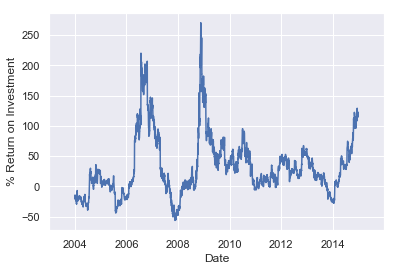

In [45]:
amzn = amzn.asfreq('D', method='pad')
ROI = 100 * (amzn.tshift(-365) / amzn - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

For more information, visit [Pandas' Official online documentation](http://pandas.pydata.org/).